<img src="../graphics/icr_logo.png" alt="drawing" width="300"/>

# Basic programming with Python
## Part 11: Tabular data and dataframes

Tabular data is a common format, when the data is arranged in rows and columns. Often, the columns will have a header like "patient name" and each row will be an instance of data, e.g. patient. The columns are delimitted by a character, usually a tab or a comma.

There is a file in comma delimitted format in the data directory called [tp53.csv](data/tp53.csv), if you click on it jupyter notebook will format it nicely so it is easy to browse.

Python uses the **pandas** library to interact with dataframes. Commonly using "pd" as an abbreviation:
```python
import pandas as pd
```


### Reading dataframes

In [72]:
import pandas as pd
import os
data_path = os.path.join(os.getcwd(), "..", "data/")
data = pd.read_csv(data_path + "tp53.csv")
print(data)

       aa  rid  ridx atom  bfactor          x          y          z
0     MET    1     0    N    40.87  39.264999  34.563999  20.674999
1     MET    1     0   CA    40.87  39.233002  33.408001  21.587999
2     MET    1     0    C    40.87  38.070000  32.562000  21.100000
3     MET    1     0   CB    40.87  39.112000  33.867001  23.059999
4     MET    1     0    O    40.87  36.952000  33.042000  21.166000
...   ...  ...   ...  ...      ...        ...        ...        ...
3055  ASP  393   392    O    47.63  28.046000  58.320000  10.847000
3056  ASP  393   392   CG    47.63  31.766001  58.821999  13.391000
3057  ASP  393   392  OD1    47.63  31.367001  58.331001  14.475000
3058  ASP  393   392  OD2    47.63  32.785000  59.555000  13.320000
3059  ASP  393   392  OXT    47.63  27.871000  58.341999  13.064000

[3060 rows x 8 columns]


### Browsing dataframes

As you can see above, we can use print in a familiar way - it won't show everything if there is too much information, just a summary. We can also print out the head or tail.

In [40]:
print(data.head(2)) # top 2 lines

  chain   aa  rid atom  bfactor          x          y          z
0     A  MET    1    N    40.87  39.264999  34.563999  20.674999
1     A  MET    1   CA    40.87  39.233002  33.408001  21.587999


In [41]:
print(data.tail(2)) # bottom 2 lines

     chain   aa  rid atom  bfactor       x          y       z
3058     A  ASP  393  OD2    47.63  32.785  59.555000  13.320
3059     A  ASP  393  OXT    47.63  27.871  58.341999  13.064


#### Indexing into a dataframe

Like with lists and dictionaries we can index into dataframes using either the numeric location or the key.
The keys are the header names, or optionally the row names if you have used indexes (which are row names).

In this example I want to find the coordinates of the CA atom of residue 1.  
_iloc_ is used for numerical indexing  
_loc_ is used for key indexing (the row keys are numbers in this case)  

In [42]:
# Since I know it is the second row and 6th, 7th, 8th columns I can use iloc
x1 = data.iloc[1,5]
y1 = data.iloc[1,6]
z1 = data.iloc[1,7]
print(x1,y1,z1)

# Better to use the column headers to get a list first
x2 = data.loc[1,"x"]
y2 = data.loc[1,"y"]
z2 = data.loc[1,"z"]
print(x2,y2,z2)

39.23300171 33.40800095 21.58799934
39.23300171 33.40800095 21.58799934


In [43]:
# We can slice the data too, this shows everything from x to z and 0:3
data.loc[0:3:,"x":"z"]

,x,y,z
0,39.264999,34.563999,20.674999
1,39.233002,33.408001,21.587999
2,38.070000,32.562000,21.100000
3,39.112000,33.867001,23.059999


*** 

⚙️ ***Exercise B-11.01***: 
- Modify the cell below to find out what atom is the 50th row in the dataframe?

***

In [44]:
import pandas as pd
data = pd.read_csv(data_path + "tp53.csv")
...

Ellipsis

#### Transposing a dataframe

Dataframes can be transposed using .T, when this tp53 dataframe is transposed you can see the data is very wide and the \ character is used to show it overruns lines.

In [46]:
print(data.T)

              0          1       2          3       4          5     \
chain            A          A       A          A       A          A   
aa             MET        MET     MET        MET     MET        MET   
rid              1          1       1          1       1          1   
atom             N         CA       C         CB       O         CG   
bfactor      40.87      40.87   40.87      40.87   40.87      40.87   
x        39.264999  39.233002   38.07     39.112  36.952  39.971001   
y        34.563999  33.408001  32.562  33.867001  33.042  33.049999   
z        20.674999  21.587999    21.1  23.059999  21.166     24.034   

              6          7          8          9     ...       3050  \
chain            A          A          A          A  ...          A   
aa             MET        MET        GLU        GLU  ...        SER   
rid              1          1          2          2  ...        392   
atom            SD         CE          N         CA  ...         OG   
bfact

*** 

⚙️ ***Exercise B-11.02***: 
- Use the cell below to find the first 3 rows of the dataframe and transpose them.

💡 - What is different about the slicing and the indexes?  
When using iloc it is the usual way and the range is exclusive of the uppoer bound.
When using loc, because it is a key and could be a string, it is inclusive. See the difference in the 2 outputs (and beware!).

***

In [83]:
print("loc------\n",data.loc[0:2,:].T)
print("\niloc------\n",data.iloc[0:2,:].T)

loc------
                  0          1       2
aa             MET        MET     MET
rid              1          1       1
ridx             0          0       0
atom             N         CA       C
bfactor      40.87      40.87   40.87
x        39.264999  39.233002   38.07
y        34.563999  33.408001  32.562
z        20.674999  21.587999    21.1

iloc------
                  0          1
aa             MET        MET
rid              1          1
ridx             0          0
atom             N         CA
bfactor      40.87      40.87
x        39.264999  39.233002
y        34.563999  33.408001
z        20.674999  21.587999


#### Summary statistics (describe)

There is a very convenient build in method to calculate the summary statistics of a dataframe. Numerical and string columns behave a little differently.

In [48]:
print(data.describe())

               rid      bfactor            x            y            z
count  3060.000000  3060.000000  3060.000000  3060.000000  3060.000000
mean    198.707843    75.129072     4.343030     4.426025    -9.798441
std     113.379307    24.597623    18.880163    20.097525    18.496904
min       1.000000    30.980000   -31.172001   -46.875999   -61.173000
25%     103.000000    47.500000   -10.272500    -6.048000   -23.581500
50%     201.000000    92.070000     0.525000     3.747500    -6.675000
75%     296.250000    96.670000    16.921750    16.452000     4.275500
max     393.000000    98.620000    52.584999    59.555000    27.563000


*** 

💡 ***Exercise B-11:03:*** 
- Explain what the describe function does  
It calculates mean, max min and quartiles


- Is there anything missing from the output that you expected?  
It only has numerical data, all the categorical/discrete data has been ignored

***

### Writing dataframes

It is just as easy to write out data, we use the method **to_csv**. In the cell below I load in the tp53 data, add a column, and write it out again to another file. 

In [49]:
import pandas as pd
data = pd.read_csv(data_path + "tp53.csv")
data["new_col"] = "type anything in" #try changing this
data.to_csv(data_path + "tp53_v2.csv")

Check the [file is there](data/tp53_v2.csv) once you have run the cell.

If you want to create a dataframe from scratch you can use various methods. One simple one way is to use a dictionary.

In [50]:
my_dic_data = {'Name': ['Tom', 'nick', 'krish', 'jack'],'Age': [20, 21, 19, 18]}
my_df_data = pd.DataFrame(my_dic_data)
print(my_df_data)

    Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18


*** 

⚙️ ***Exercise B-11.04***: 
- In cell above can you modify it and also add a department?

***

### Plotting dataframes

matplotlib is the most widely used plotting library, but we will also have a very quick look at plotly due to its interactive features.

Install by running the pip install line in the cell below.

In [52]:
pip install matplotlib plotly

Note: you may need to restart the kernel to use updated packages.


##### A very simple 1d plot

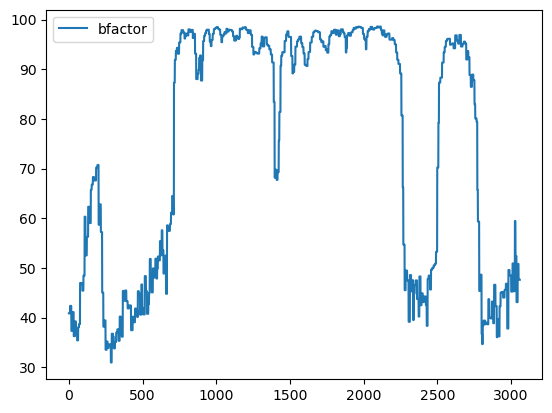

In [53]:
data.T.loc["bfactor"].plot()
plt.legend()

##### A simple scatter plot

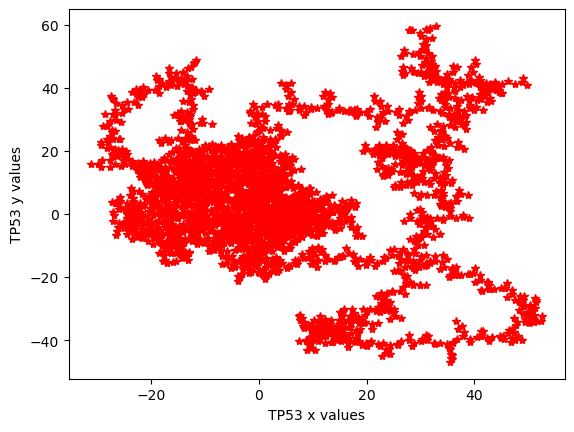

In [64]:
import matplotlib.pyplot as plt
xs = data.loc[:,"x"]
ys = data.loc[:,"y"]
plt.xlabel("TP53 x values")
plt.ylabel("TP53 y values")
plt.plot(xs,ys,"r*")

We can change the colours and the markers with a few simple options:
_  .  --  *  |  
'b' as blue  
'g' as green  
'r' as red  
'c' as cyan  
'm' as magenta  
'y' as yellow  
'k' as black  
'w' as white  
(the default colour is a more muted blue)

***

⚙️ ***Exercise B-11:05:*** 
- Play around with the plotting values (k.) in the cell above and see the different colours and marker styles.

***

### Saving the plots

You can change how you save the file depending on the extension you choose.
To save a plt you want to get the figure object.



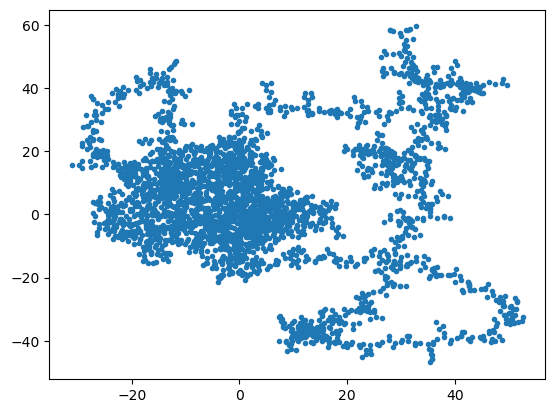

In [65]:
plt.plot(xs,ys,".")
plt.savefig(data_path + "my_plot.png")
plt.savefig(data_path + "my_plot.pdf")

***

⚙️ ***Exercise:B-11:06*** 

- Can you create and save 3 images of the TP53 coordinates? The x-y, x-z and y-z projections 
n.b. call plt.close() between each plot to clear it out othr they write ontop of each other (which you may want sometimes).
    
***

In [71]:
import matplotlib.pyplot as plt
xs = data.loc[:,"x"]
ys = data.loc[:,"y"]
zs = data.loc[:,"z"]

#x-y
plt.xlabel("TP53 x values")
plt.ylabel("TP53 y values")
plt.plot(xs,ys,"b.")
plt.savefig(data_path + "my_plot_xy.pdf")
plt.close()

#x-z
plt.xlabel("TP53 x values")
plt.ylabel("TP53 z values")
plt.plot(xs,zs,"r.")
plt.savefig(data_path + "my_plot_xz.pdf")
plt.close()

#y-z
plt.xlabel("TP53 y values")
plt.ylabel("TP53 z values")
plt.plot(ys,zs,"y.")
plt.savefig(data_path + "my_plot_yz.pdf")
plt.close()

# Plotly

For completeness this shows you a use of the plotly library with this data in 2d and 3d, the main difference being the interactive element.

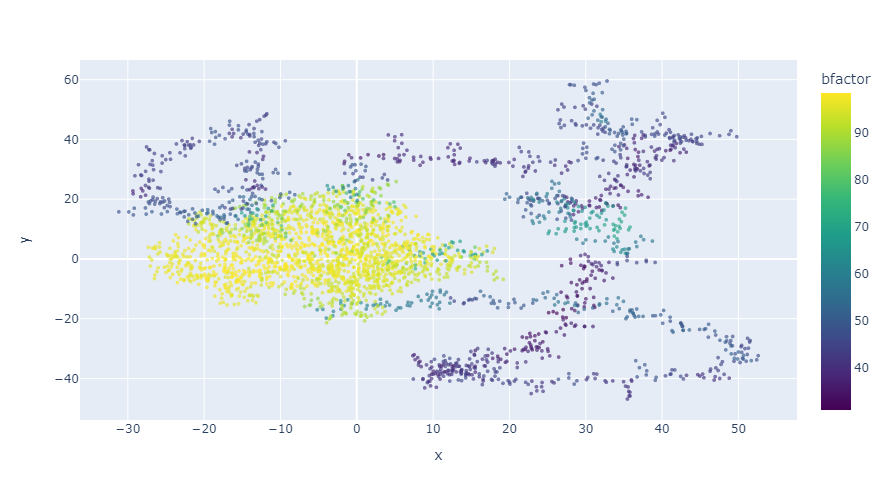

In [56]:
import plotly.express as px
fig = px.scatter(data, x='x', y='y',color='bfactor',title='',width=900, height=500, 
                    opacity=0.65, color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=4,line=dict(width=0.000,color='grey')),selector=dict(mode='markers'))
fig.show()

The hue can also be categorical data

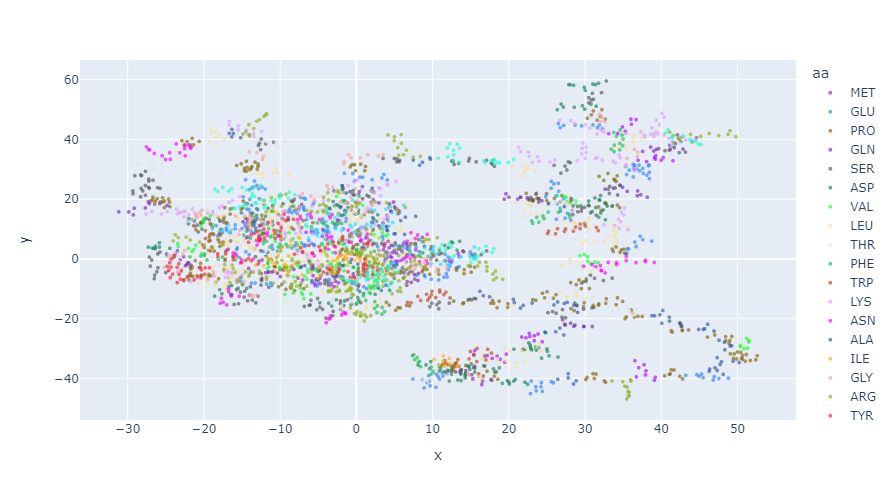

In [57]:
import plotly.express as px
fig = px.scatter(data, x='x', y='y',color='aa',title='',width=900, height=500, 
                    opacity=0.65,color_discrete_sequence =px.colors.qualitative.Alphabet )
fig.update_traces(marker=dict(size=4,line=dict(width=0.000,color='grey')),selector=dict(mode='markers'))
fig.show()

*** 

💡 ***Exercise B-11:07:*** 
- What has changed in the 2 calls to plotly?  
The color has gone from continuous to discrete and is Alphabet instead of Viridis
- What is different about the data?  
The data is categorical rather than numerical, in this case there are 20 amino acids.

***

In [61]:
import plotly.express as px
fig = px.scatter_3d(data, x='x', y='y', z='z',color='bfactor',title='',width=900, height=500, 
                    opacity=0.65, color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=4,line=dict(width=0.000,color='grey')),selector=dict(mode='markers'))
fig.show()

Ploty images can be saved as html files which retain their interactive elements.

In [60]:
fig.write_html(data_path + "plotly.html")

### Resources for matplotlib
https://matplotlib.org/  
https://python-graph-gallery.com/matplotlib/

### Resources for plotly
https://plotly.com/python/  
https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express  
https://plotly.com/python/builtin-colorscales/#continuous-color-scales-in-dash  